<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
np.random.seed(0)

In [15]:
digits = datasets.load_digits()

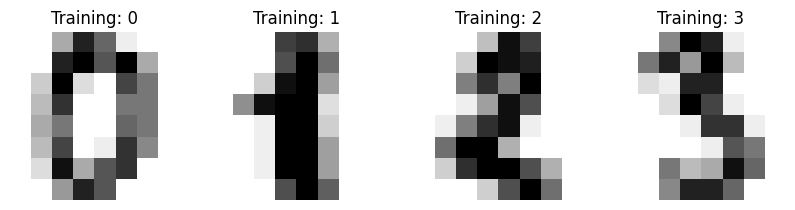

In [16]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [17]:
data = digits.images.reshape((len(digits.images), -1))

In [20]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=3, min_samples_leaf=2)
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.33)

In [22]:
X_train.shape

(1203, 64)

In [23]:
y_train.shape

(1203,)

In [32]:
clf = DecisionTreeClassifier()

params = {
    'max_depth': range(1, 10 + 1),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(1, 5 + 1),
    'min_samples_leaf': range(1, 5 + 1)
}

grid = GridSearchCV(clf, params, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [34]:
best_clf = grid.best_estimator_

In [35]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [36]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [38]:
y_pred = best_clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [51]:
accuracy_score(y_test, y_pred)

0.8619528619528619

In [57]:
precision_score(y_test, y_pred, average='macro')

0.8626954698255516

In [59]:
recall_score(y_test, y_pred, average='macro')

0.8646340617417444

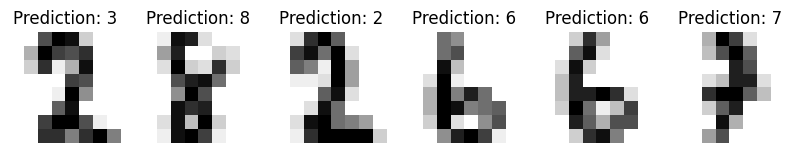

In [47]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, pred in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {pred}")